In [144]:
import matplotlib.pyplot as plt;import seaborn
%matplotlib inline 

### 8.1 python标准库的时间处理函数

#### 1. datetime模块
1. 当前时间 : `datetime.now`
2. datetime对象初始化 : `datetime(year,month,day,hour,minutes,seconds,miliseconds,timezone)`, 参数都是int型

In [1]:
from datetime import datetime 
print(datetime.now())
print(datetime(1991,7,31,11,20,2))

2018-06-25 17:11:52.508432
1991-07-31 11:20:02


#### 2. datetime与string相互转化
1. datetime转换为string  
  datetime.strftime(TIMEFORMAT) : 转换为对应格式的字符串  
   1. %Y
   2. %m
   3. %d
   4. %H
   5. %M
   6. %S
2. string转换为datetime对象  
   使用dateutil包, parser.parse(str)  
   该方法不用传入时间格式, 自动判断
  

In [2]:
# date2str
stmp = datetime(2018,5,19,11,59,0)
time2str = stmp.strftime('%Y-%m-%d %H:%M:%S')
print time2str
# str2date
from dateutil import parser
print parser.parse(time2str)


2018-05-19 11:59:00
2018-05-19 11:59:00


#### 3. pandas中转换datetime
1. pd.to_datetime(Series/DateFrame/Index)
2. pandas中时间空值: Nat , not a time

In [3]:
import pandas as pd
from pandas import Series,DataFrame,Index
pindex = Index(['2011-07-06 12:00:00', '2011-08-06 00:00:00','NaT'])

datetimeindex = pd.to_datetime(pindex)

print datetimeindex
print datetimeindex.isnull()

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
[False False  True]


### 8.2 时间序列基础
#### 一. pandas中的时间索引
1. pandas中, 最基本的时间序列类型是以时间戳为索引的Series. 时间戳可以是python字符串或Datatime类型  
2. 两个时间索引的Series之间运算, 会自动按照时间对齐  
3. pandas使用numpy的datetime64数据类型以纳秒存储时间戳    
4. Datetime索引中每一项都是pandas的Timestamp类型    
 pandas.Timestamp对象可以随时转换为Datetime对象

In [4]:
# 1.时间序列
from datetime import datetime
import numpy as np
data = [datetime(2018,5,1),datetime(2018,5,12),datetime(2018,5,6)]
ts = pd.Series(np.random.rand(3),index=data)
print ts
print '============================'
print ts.index
# 2.时间序列之间的运算
print ts[::2] # 每隔2个取一项
print ts + ts[::2]
print '============================'
# 3.时间类型索引以纳秒存储
print ts.index.dtype
print type(ts.index)
print '============================'
# 4.时间索引的每一项都是Tiestamp
ts.index[0]

2018-05-01    0.720018
2018-05-12    0.657220
2018-05-06    0.669968
dtype: float64
DatetimeIndex(['2018-05-01', '2018-05-12', '2018-05-06'], dtype='datetime64[ns]', freq=None)
2018-05-01    0.720018
2018-05-06    0.669968
dtype: float64
2018-05-01    1.440036
2018-05-06    1.339936
2018-05-12         NaN
dtype: float64
datetime64[ns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Timestamp('2018-05-01 00:00:00')

#### 二. 递增的时间索引产生
1. pd.date_range() 自动生成时间索引  
  1. 传入起始时间
  2. periods: 生成多少个时间索引
  3. freq: 生成索引的时间间隔, 默认是一天  
    1. D: 每日
    2. B: 每个工作日
    3. H: 每小时
    4. min: 每分钟
    5. M: 每月最后一个日历日
    6. BM: bussiness month, 每月最后一个工作日  
      ... 此外, 还有很多日历生成规则

2. 关于freq属性的其他用法  
 除了上面的字母标识外, 还有很多其他表示方法
  1. 可以直接传入频率字符串, 比如'3h25min'
  2. 'WOM': week of month, 是你能获得注入每月第三个星期五这类
<img src='img/pandas-timeseries-freqparam.png'>
<img src='img/freq2.png'>
<img src='img/freq3.png'>

In [5]:
# 每隔5小时产生一个索引
pd.date_range('2018/01/01',periods=10,freq='5H')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 05:00:00',
               '2018-01-01 10:00:00', '2018-01-01 15:00:00',
               '2018-01-01 20:00:00', '2018-01-02 01:00:00',
               '2018-01-02 06:00:00', '2018-01-02 11:00:00',
               '2018-01-02 16:00:00', '2018-01-02 21:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [6]:
pd.date_range('2018/01/01',periods=5,freq='3h50min')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 03:50:00',
               '2018-01-01 07:40:00', '2018-01-01 11:30:00',
               '2018-01-01 15:20:00'],
              dtype='datetime64[ns]', freq='230T')

In [7]:
pd.date_range('2018/01/01',periods=5,freq='WOM-3FRI')

DatetimeIndex(['2018-01-19', '2018-02-16', '2018-03-16', '2018-04-20',
               '2018-05-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

#### 三. 索引选取
1. 传入表示时间的字符串  
2. 只传入'年','月'的字符串即可对时间序列数据分片  
3. 由于时间可以比大小, 因此可以在索引选取时指定时间范围: `start:end`    
4. 另一种选取时间范围的数据是 Series.truncate(after='',before='')  
  truncate返回的是原始Series的视图, 不改变原Series的数据, 因此也是一种切片操作

In [8]:
# 1. 时间的字符串选取
print ts['2018/05/01']
print '============================'
# 2. 按照'年'切片数据
longerts = pd.Series(np.random.rand(1000),index=pd.date_range('2000/1',periods=1000)) # periods:按天递增的个数
print longerts[-3:]
print ''
series_2001 = longerts['2001']
print series_2001[:3]
print '============================'
# 3.按照'月'切片数据
series_2001_05 = longerts['2000-05']
print series_2001_05[:3]


2018-05-01    0.720018
dtype: float64
2002-09-24    0.708581
2002-09-25    0.006113
2002-09-26    0.795545
Freq: D, dtype: float64

2001-01-01    0.582442
2001-01-02    0.528827
2001-01-03    0.546495
Freq: D, dtype: float64
2000-05-01    0.095603
2000-05-02    0.757354
2000-05-03    0.521666
Freq: D, dtype: float64


In [9]:
# 4. 指定时间范围
longerts['2000/5':'2000/6'].head()

2000-05-01    0.095603
2000-05-02    0.757354
2000-05-03    0.521666
2000-05-04    0.508035
2000-05-05    0.291366
Freq: D, dtype: float64

In [10]:
# truncate
longerts.truncate(after='2000-01-09')

2000-01-01    0.999909
2000-01-02    0.226653
2000-01-03    0.510374
2000-01-04    0.055840
2000-01-05    0.624686
2000-01-06    0.000185
2000-01-07    0.265198
2000-01-08    0.828399
2000-01-09    0.866666
Freq: D, dtype: float64

#### 四. 带有重复时间索引的数据
1. 检查索引的is_unique属性, 查看索引是否重复
2. 通过时间索引值来选取元素时, 要么返回标量, 要么返回切片, 关键看传入的索引是否是重复索引
3. 对重复索引聚合使用groupby方法, 传入level=0

In [11]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000','1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5),dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [12]:
# 返回False, 表示索引中存在重复元素
print dup_ts.index.is_unique
print '============================'
# 重复索引选取
print dup_ts['2000-01-02']
print '============================'
dup_ts.groupby(level=0).mean()

False
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64


2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

### 8.3 日期的范围,频率及移动

#### 一. 超前或滞后数据
1. sihft(n) : 整体数据向下移动  
 shift惭怍不会改变索引的位置, 只会改变column方向上的数据

2. 通过偏移量对日期位移  
  1. pandas.tseries.offset包含有日期偏移对象 : Day,MonthEnd    
  2. MonthEnd偏移的用法 :  
    1. MonthEnd(): 当月最后一天  
    2. MonthEnd(2): 后一个月最后一天   
    3. MonthEnd.rollforward(time)/rollback(time)明确向前/向后进行偏移
  
3. 通过groupby(fuc), 指定确定同一个分组使用的函数来聚合数据

In [13]:
ts = pd.Series(np.random.rand(4),
              index=pd.date_range('2000-01-01',periods=4,freq='M')) # 每月最后一天
ts

2000-01-31    0.652918
2000-02-29    0.142376
2000-03-31    0.890710
2000-04-30    0.821653
Freq: M, dtype: float64

In [14]:
# 1.shift偏移
print ts.shift(2)
ts.shift(-1)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.652918
2000-04-30    0.142376
Freq: M, dtype: float64


2000-01-31    0.142376
2000-02-29    0.890710
2000-03-31    0.821653
2000-04-30         NaN
Freq: M, dtype: float64

In [15]:
# 2. 偏移量移动时间
from pandas.tseries.offsets import Day,MonthEnd
now = datetime.now()
print 'now + 2*Day',now + 2*Day()
print 'now + MonthEnd',now + MonthEnd() 
print 'now + 2MonthEnd',now + MonthEnd(2)

print '============================'

# MonthEnd锚点偏移
offset = MonthEnd()
print 'offset.rollforward(now) : ',offset.rollforward(now)
print 'offset.rollback(now)',offset.rollback(now)

now + 2*Day 2018-06-27 17:12:02.727769
now + MonthEnd 2018-06-30 17:12:02.727769
now + 2MonthEnd 2018-07-31 17:12:02.727769
offset.rollforward(now) :  2018-06-30 17:12:02.727769
offset.rollback(now) 2018-05-31 17:12:02.727769


In [16]:
# 3. groupby(func)
ts = pd.Series(np.random.rand(10),
              index=pd.date_range('2000-01-01',periods=10,freq='5d'))
print ts
from pandas.tseries import offsets 
offset = offsets.MonthBegin()
ts.groupby(offset.rollforward).mean()

2000-01-01    0.176378
2000-01-06    0.505072
2000-01-11    0.467735
2000-01-16    0.052345
2000-01-21    0.603347
2000-01-26    0.546968
2000-01-31    0.416843
2000-02-05    0.223416
2000-02-10    0.086985
2000-02-15    0.276159
Freq: 5D, dtype: float64


2000-01-01    0.176378
2000-02-01    0.432052
2000-03-01    0.195520
dtype: float64

### 8.4 时区处理
#### 一. 何为时区
1. 以格林威治时间(UTC)为世界时间标准.
2. 时区以格林威治时间偏移量来表示
3. python的pytz包, 有关时区的信息都在这里  
  1. 获取所有时区: `pytz.common_timezones`
  2. 创建时区对象: `pytz.timezone`

In [17]:
# 查看前三个时区
import pytz
print pytz.common_timezones[:3]
print pytz.country_timezones('cn')
pytz.timezone('Asia/Shanghai')

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa']
[u'Asia/Shanghai', u'Asia/Urumqi']


<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

#### 二. pandas时区本地化和转换
1. pandas中的时间索引, 默认不带时区
2. 将Series/DataFrame转变为带时区(本地化)的 : `Series/DataFrame.tz_localize('UTC..')`
3. 时区转换: `Series/DataFrame.tz_convert('')`
4. 上述两个方法, 也可以应用在DateIndex上

In [18]:
dateIdx = pd.date_range('1990-01-01 9:30',periods=6,freq='D')
ts = pd.Series(np.random.rand(6),index=dateIdx)
print ts.index.tz #None, 默认没有时区
print '不带时区:\n',ts 
ts_utc = ts.tz_localize('UTC')
print '带时区:\n', ts_utc
print '东八区\n', ts_utc.tz_convert('Asia/Shanghai')

None
不带时区:
1990-01-01 09:30:00    0.552647
1990-01-02 09:30:00    0.906692
1990-01-03 09:30:00    0.010798
1990-01-04 09:30:00    0.077870
1990-01-05 09:30:00    0.289107
1990-01-06 09:30:00    0.142588
Freq: D, dtype: float64
带时区:
1990-01-01 09:30:00+00:00    0.552647
1990-01-02 09:30:00+00:00    0.906692
1990-01-03 09:30:00+00:00    0.010798
1990-01-04 09:30:00+00:00    0.077870
1990-01-05 09:30:00+00:00    0.289107
1990-01-06 09:30:00+00:00    0.142588
Freq: D, dtype: float64
东八区
1990-01-01 17:30:00+08:00    0.552647
1990-01-02 17:30:00+08:00    0.906692
1990-01-03 17:30:00+08:00    0.010798
1990-01-04 17:30:00+08:00    0.077870
1990-01-05 17:30:00+08:00    0.289107
1990-01-06 17:30:00+08:00    0.142588
Freq: D, dtype: float64


#### 三. pandas的Timestamp对象也可以设置时区
1. 创建Timestamp对象 : `pd.Timestamp('time')`
2. pands的时间索引,无论带什么时区, 内部都按照UTC时区存储
2. 分配时区和更改时区:  
  `Timestamp.tz_convert`与`Timestamp.tz_localize`
3. offset对象与时间运算, 会保留时区
4. 不同时区索引的pandas数据结构进行运算时, 会按照UTC时间对齐索引, 并返回UTC类型的索引

In [19]:
stamp = pd.Timestamp('2011-09-09 11:20')
print stamp
shanghai_stamp = stamp.tz_localize('Asia/Shanghai')
print shanghai_stamp
print shanghai_stamp.tz_convert('UTC')
from pandas.tseries.offsets import Hour
print shanghai_stamp+2*Hour()
print '================================='
# 不同时区进行运算, 会转换为UTC时间对齐, 且返回UTC时间索引
ts = pd.Series(np.random.rand(5),index=pd.date_range('2018-01-01 12:30',periods=5,freq='B'))
ts1 = ts[:2].tz_localize('Europe/London')
ts2 = ts1[:2].tz_convert('Europe/Moscow')
print ts
print ts1+ts2

2011-09-09 11:20:00
2011-09-09 11:20:00+08:00
2011-09-09 03:20:00+00:00
2011-09-09 13:20:00+08:00
2018-01-01 12:30:00    0.114073
2018-01-02 12:30:00    0.499238
2018-01-03 12:30:00    0.670014
2018-01-04 12:30:00    0.887691
2018-01-05 12:30:00    0.233413
Freq: B, dtype: float64
2018-01-01 12:30:00+00:00    0.228145
2018-01-02 12:30:00+00:00    0.998477
Freq: B, dtype: float64


### 8.5 时期及算术运算 (未完)

#### 一. pandas时期对象
1. pd.Period对象表示时期对象, 即时间区间  
 Period('date string',freq) : 在date string表所在的时间区间上, 根据freq产生的时间
 freq参数: 在Period对象运算时使用的频率
 `pd.Period(2017,freq='A-DEC')`: 表示2017年从1月1日到12月31日的所有时间
 
2. `pd.period_range(start,end,freq)`: 产生符合规则的时期范围

In [49]:
# Period('2017-01', 'M')
p = pd.Period('2017-01-01',freq='M')
# Period('2017-03', 'M')

Period('2017-03', 'M')

In [52]:
pd.period_range('2018-01-01','2018-05-23',freq='M')

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05'], dtype='period[M]', freq='M')

In [53]:
values = ['2001Q3', '2002Q2', '2003Q1']
pd.PeriodIndex(values,freq='Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 8.6 重采样及频率转换
#### 一. 重采样
1. 重采样 : 指将时间序列从一个频率转换为另一个频率的过程  
 高频率数据聚合成低频率数据 : 降采样  
 低频率数据转换成高频率数据 : 升采样 
 
2. Series/DataFrame都由resample方法, 用于各种频率转换  
  1. resample类似于groupby, 调用resample可以分组数据, 然后进行聚合函数
  2. 参数 :  
    1. rule : string, 每重新分配的面元 
    2. axis : 默认0  
    3. closed : {'right', 'left'}, 定义面元是区间是左闭的, 还是右闭的, 默认left
    4. label  : {'right', 'left'}, 最终resample后的数据, 时间显示区间左端点的时间还是右端点的时间, 默认left
    5. loffset : 下面

In [8]:
# resample基本用法
import pandas as pd 
import numpy as np
np.random.seed(1)
idx = pd.date_range('2000-01-01',periods=100,freq='D')
ts = pd.Series(np.random.rand(100),index=idx)
ts.resample('M').mean()

2000-01-01    0.417022
2000-01-02    0.720324
2000-01-03    0.000114
2000-01-04    0.302333
2000-01-05    0.146756
Freq: D, dtype: float64

#### 二. 降采样
1. 降采样要指定resample方法中的rule, 定义切割时间面元的方法   
  例如: 每5分钟为一个间隔 : rule='5min', 即  
    1. 若closed=right, 会把第一个元素当做单独的区间处理(第一个元素属于上一个区间)
    2. 若closed=left, 会从第一个元素开始划分区间
2. `loffset`参数 :  
  通过`(label=right, loffset='-freq')`的组合, 把最终显示的时间加上offset, 以表明该降采样结果所在面元

In [60]:
# 1. 如下产生每分钟的数据
rng = pd.Series(np.arange(12)+1,index=pd.date_range('2000-01-01 12:00:00',periods=12,freq='T'))
print rng
# 2. 每5分钟设为一个bin
print '===> label=right'
print rng.resample('5min',closed='right',label='right').sum()
print ('===> label=left')
print rng.resample('5min',closed='left',label='left').sum()

2000-01-01 12:00:00     1
2000-01-01 12:01:00     2
2000-01-01 12:02:00     3
2000-01-01 12:03:00     4
2000-01-01 12:04:00     5
2000-01-01 12:05:00     6
2000-01-01 12:06:00     7
2000-01-01 12:07:00     8
2000-01-01 12:08:00     9
2000-01-01 12:09:00    10
2000-01-01 12:10:00    11
2000-01-01 12:11:00    12
Freq: T, dtype: int64
===> label=right
2000-01-01 12:00:00     1
2000-01-01 12:05:00    20
2000-01-01 12:10:00    45
2000-01-01 12:15:00    12
Freq: 5T, dtype: int64
===> label=left
2000-01-01 12:00:00    15
2000-01-01 12:05:00    40
2000-01-01 12:10:00    23
Freq: 5T, dtype: int64


In [61]:
ts = pd.Series(np.arange(12)+1,index = pd.date_range('2001-01-01',periods=12,freq='D'))
print ts
print
print ts.resample('5D',label='right',closed='right').sum()
print
print ts.resample('5D',label='left',closed='left').sum()

2001-01-01     1
2001-01-02     2
2001-01-03     3
2001-01-04     4
2001-01-05     5
2001-01-06     6
2001-01-07     7
2001-01-08     8
2001-01-09     9
2001-01-10    10
2001-01-11    11
2001-01-12    12
Freq: D, dtype: int64

2001-01-01     1
2001-01-06    20
2001-01-11    45
2001-01-16    12
Freq: 5D, dtype: int64

2001-01-01    15
2001-01-06    40
2001-01-11    23
Freq: 5D, dtype: int64


In [31]:
# offset参数
print rng.resample('5min',closed='right',label='right',loffset='-2.5min').sum()

1999-12-31 23:57:30     0
2000-01-01 00:02:30    15
2000-01-01 00:07:30    40
2000-01-01 00:12:30    11
Freq: 5T, dtype: int64


In [132]:
# 按季度统计
obj = pd.Series(np.random.randint(1,5,size=(24,)),
               index=pd.date_range('2018-1-1',periods=24,freq='M'))
print obj.head()
print 
print obj.resample('Q').sum()

2018-01-31    2
2018-02-28    3
2018-03-31    2
2018-04-30    1
2018-05-31    1
Freq: M, dtype: int64

2018-03-31     7
2018-06-30     3
2018-09-30     7
2018-12-31    11
2019-03-31    12
2019-06-30     6
2019-09-30     8
2019-12-31    11
Freq: Q-DEC, dtype: int64


#### 三. 升采样

In [63]:
# resample默认lable='left', closed='left'
print rng
rng.resample('5min').ohlc()

2000-01-01 12:00:00     1
2000-01-01 12:01:00     2
2000-01-01 12:02:00     3
2000-01-01 12:03:00     4
2000-01-01 12:04:00     5
2000-01-01 12:05:00     6
2000-01-01 12:06:00     7
2000-01-01 12:07:00     8
2000-01-01 12:08:00     9
2000-01-01 12:09:00    10
2000-01-01 12:10:00    11
2000-01-01 12:11:00    12
Freq: T, dtype: int64


,open,high,low,close
2000-01-01 12:00:00,1,5,1,5
2000-01-01 12:05:00,6,10,6,10
2000-01-01 12:10:00,11,12,11,12


#### 四. 升采样
1. `Series/DataFrame.resample('fine freq').asfreq()`提升数据频率,填充空值:   
 由于采样频率的提升, 产生的细粒度时间样本集必然会包含空值
2. `Series/DataFrame.resample('fine freq').ffill()`: 填充指定值  
  1. ffill() 提升频率, 填充策略和filna和reindex一样

In [80]:
np.random.seed(1)
# 2018-06-27日所在周的周五
df = pd.DataFrame(np.random.rand(2,4),
                  index=pd.date_range('2018-06-27',periods=2,freq='W-WED'),
                 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
df

,Colorado,Texas,New York,Ohio
2018-06-27,0.417022,0.720324,0.000114,0.302333
2018-07-04,0.146756,0.092339,0.186260,0.345561


In [83]:
# 将时间频率提升到天
df.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2018-06-27,0.417022,0.720324,0.000114,0.302333
2018-06-28,NaN,NaN,NaN,NaN
2018-06-29,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN
2018-07-02,NaN,NaN,NaN,NaN
2018-07-03,NaN,NaN,NaN,NaN
2018-07-04,0.146756,0.092339,0.186260,0.345561


In [87]:
df.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2018-06-27,0.417022,0.720324,0.000114,0.302333
2018-06-28,0.417022,0.720324,0.000114,0.302333
2018-06-29,0.417022,0.720324,0.000114,0.302333
2018-06-30,0.417022,0.720324,0.000114,0.302333
2018-07-01,0.417022,0.720324,0.000114,0.302333
2018-07-02,0.417022,0.720324,0.000114,0.302333
2018-07-03,0.417022,0.720324,0.000114,0.302333
2018-07-04,0.146756,0.092339,0.186260,0.345561


In [89]:
df.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2018-06-27,0.417022,0.720324,0.000114,0.302333
2018-06-28,0.417022,0.720324,0.000114,0.302333
2018-06-29,0.417022,0.720324,0.000114,0.302333
2018-06-30,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN
2018-07-02,NaN,NaN,NaN,NaN
2018-07-03,NaN,NaN,NaN,NaN
2018-07-04,0.146756,0.092339,0.186260,0.345561


In [94]:
df.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2018-06-28,0.417022,0.720324,0.000114,0.302333
2018-07-05,0.146756,0.092339,0.186260,0.345561


#### 五. 通过时期索引重采样

In [111]:
df = pd.DataFrame(np.random.randint(1,5,(24,4)),
                 index = pd.period_range('2018-01','2019-12',freq = 'M'),
                 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
df.head()
df

,Colorado,Texas,New York,Ohio
2018-01,2,1,3,2
2018-02,3,1,2,4
2018-03,3,3,3,2
2018-04,1,4,3,4
2018-05,1,3,2,4
2018-06,3,1,3,2
2018-07,3,4,1,2
2018-08,3,2,2,3
2018-09,3,3,3,2
2018-10,4,2,4,1


In [116]:
# 1. 降采样 
# 每年开始,到每年的2月份最后一天为一个period
annual_df = df.resample('A-FEB').mean()
annual_df

,Colorado,Texas,New York,Ohio
2018,2.500000,1.0,2.500000,3.000000
2019,2.666667,3.0,2.416667,2.583333
2020,2.200000,2.0,1.900000,3.300000


In [120]:
# 2.升采样 : 指定新频率中区间的哪端存放原来的值
# 默认convention=start, 原始值存放在开始处. 也可设置convention=end
annual_df.resample('Q-FEB').asfreq()

,Colorado,Texas,New York,Ohio
2018Q1,2.500000,1.0,2.500000,3.000000
2018Q2,NaN,NaN,NaN,NaN
2018Q3,NaN,NaN,NaN,NaN
2018Q4,NaN,NaN,NaN,NaN
2019Q1,2.666667,3.0,2.416667,2.583333
2019Q2,NaN,NaN,NaN,NaN
2019Q3,NaN,NaN,NaN,NaN
2019Q4,NaN,NaN,NaN,NaN
2020Q1,2.200000,2.0,1.900000,3.300000
2020Q2,NaN,NaN,NaN,NaN


In [121]:
annual_df.resample('Q-FEB',convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2018Q4,2.500000,1.0,2.500000,3.000000
2019Q1,NaN,NaN,NaN,NaN
2019Q2,NaN,NaN,NaN,NaN
2019Q3,NaN,NaN,NaN,NaN
2019Q4,2.666667,3.0,2.416667,2.583333
2020Q1,NaN,NaN,NaN,NaN
2020Q2,NaN,NaN,NaN,NaN
2020Q3,NaN,NaN,NaN,NaN
2020Q4,2.200000,2.0,1.900000,3.300000


### 8.7 移动窗口函数
#### 一. rolling方法
1. `Series/DataFrame.rolling(n)`  
 `rolling`操作与`group`操作很像, 但不是创建分组, 而是创建一个n个长度的窗口对象  
2. n的选择 :   
  n可以是int数字, 表示滑动窗口的大小; 也可以是字符串表示的freq  
  此时选择频率的窗口, 适应于处理不规则的时间排列(缺少几天等)

In [210]:
df = pd.read_csv('../example/stock_px_2.csv',parse_dates=True,index_col=0)
df.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


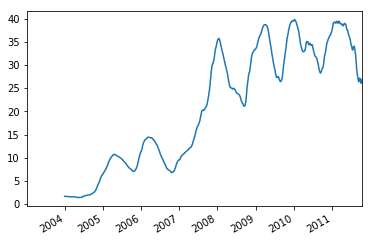

In [211]:
# 1. rolling滑动窗口
df.AAPL.rolling(250).std().plot()

2003-01-02     7.40
2003-01-03    14.85
2003-01-06    22.30
2003-01-07    22.33
2003-01-08    22.16
Name: AAPL, dtype: float64

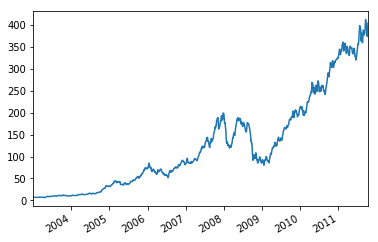

In [212]:
# 可以看见, 数据中经缺少2003-01-04,2003-01-05的数据  
# 5天的滚动均值
df.AAPL.rolling('5D').mean().plot()
# rolling('5D')严格向前计算5天
df.AAPL.rolling('5D').sum().head()


#### 二. ewm方法  
1. ewm(span=N)  
 指数加权平均, span相当于rolling方法中的窗口大小, 但ewm使用指数平滑计算

2. 指数加权统计会赋予近期的观测值更大的权数，rolling相对于等权统计

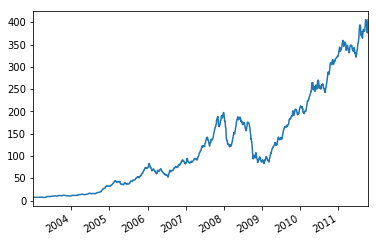

In [213]:
df.AAPL.ewm(span=5).mean().plot()